In [334]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from pandas.plotting import scatter_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import pickle
import xgboost as xg

In [335]:
df = pd.read_csv("train_wn75k28.csv")
test_df = pd.read_csv("test_Wf7sxXF.csv")


In [336]:
df.head()

,id,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy
0,1,2021-01-01,1,2,2.0,2020-09-24,0,0,0,0,0,0,1,1,0,0,0,0,0
1,2,2021-01-01,2,1,2.0,2020-09-19,1,0,1,0,0,0,1,0,0,0,0,0,0
2,3,2021-01-01,9,3,3.0,2021-08-11,1,0,0,0,0,0,0,0,0,0,0,0,0
3,4,2021-01-01,6,7,2.0,2017-10-04,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,2021-01-01,4,6,NaN,2020-06-08,0,0,0,0,0,0,1,0,0,0,1,0,0


# Statistical view

In [337]:
df.shape

(39161, 19)

In [338]:
df.columns

Index(['id', 'created_at', 'campaign_var_1', 'campaign_var_2',
       'products_purchased', 'signup_date', 'user_activity_var_1',
       'user_activity_var_2', 'user_activity_var_3', 'user_activity_var_4',
       'user_activity_var_5', 'user_activity_var_6', 'user_activity_var_7',
       'user_activity_var_8', 'user_activity_var_9', 'user_activity_var_10',
       'user_activity_var_11', 'user_activity_var_12', 'buy'],
      dtype='object')

In [339]:
df.nunique()

id                      39161
created_at                365
campaign_var_1             16
campaign_var_2             15
products_purchased          4
signup_date              1800
user_activity_var_1         4
user_activity_var_2         2
user_activity_var_3         2
user_activity_var_4         2
user_activity_var_5         3
user_activity_var_6         4
user_activity_var_7         3
user_activity_var_8         3
user_activity_var_9         2
user_activity_var_10        2
user_activity_var_11        5
user_activity_var_12        2
buy                         2
dtype: int64

In [340]:
df.isnull().sum()

id                          0
created_at                  0
campaign_var_1              0
campaign_var_2              0
products_purchased      20911
signup_date             15113
user_activity_var_1         0
user_activity_var_2         0
user_activity_var_3         0
user_activity_var_4         0
user_activity_var_5         0
user_activity_var_6         0
user_activity_var_7         0
user_activity_var_8         0
user_activity_var_9         0
user_activity_var_10        0
user_activity_var_11        0
user_activity_var_12        0
buy                         0
dtype: int64

In [341]:
df.describe()

,id,campaign_var_1,campaign_var_2,products_purchased,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy
count,39161.000000,39161.000000,39161.000000,18250.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000
mean,19581.000000,6.523812,6.452746,2.154137,0.400092,0.006716,0.102832,0.011465,0.151503,0.499834,0.286612,0.174434,0.011440,0.000383,0.218942,0.000562,0.051020
std,11304.951283,3.472944,2.614296,0.779815,0.509194,0.081676,0.303743,0.106463,0.359681,0.558166,0.455784,0.379689,0.106346,0.019568,0.431544,0.023696,0.220042
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9791.000000,4.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,19581.000000,6.000000,6.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,29371.000000,9.000000,8.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,39161.000000,16.000000,15.000000,4.000000,3.000000,1.000000,1.000000,1.000000,2.000000,3.000000,2.000000,2.000000,1.000000,1.000000,4.000000,1.000000,1.000000


In [342]:
df.describe(include='object')

,created_at,signup_date
count,39161,24048
unique,365,1800
top,2021-12-26,2021-07-18
freq,181,45


In [343]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39161 entries, 0 to 39160
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    39161 non-null  int64  
 1   created_at            39161 non-null  object 
 2   campaign_var_1        39161 non-null  int64  
 3   campaign_var_2        39161 non-null  int64  
 4   products_purchased    18250 non-null  float64
 5   signup_date           24048 non-null  object 
 6   user_activity_var_1   39161 non-null  int64  
 7   user_activity_var_2   39161 non-null  int64  
 8   user_activity_var_3   39161 non-null  int64  
 9   user_activity_var_4   39161 non-null  int64  
 10  user_activity_var_5   39161 non-null  int64  
 11  user_activity_var_6   39161 non-null  int64  
 12  user_activity_var_7   39161 non-null  int64  
 13  user_activity_var_8   39161 non-null  int64  
 14  user_activity_var_9   39161 non-null  int64  
 15  user_activity_var_1

# Data Preprocessing

<AxesSubplot:>

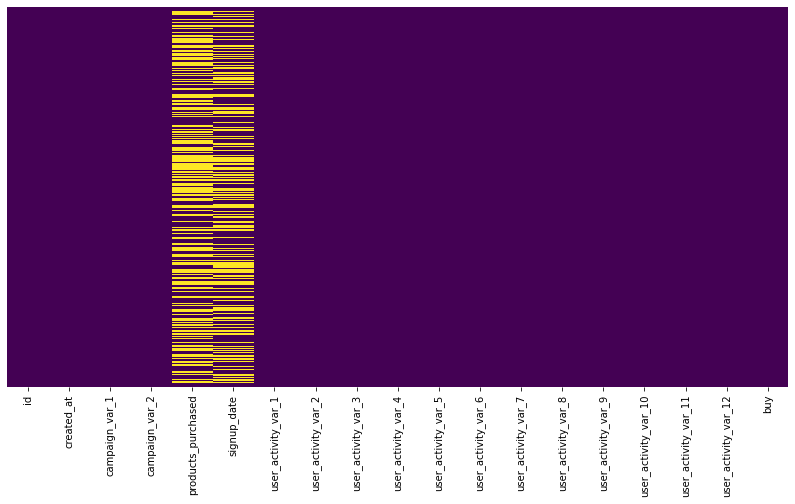

In [344]:
plt.figure(figsize=(14, 7))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap="viridis")

<AxesSubplot:>

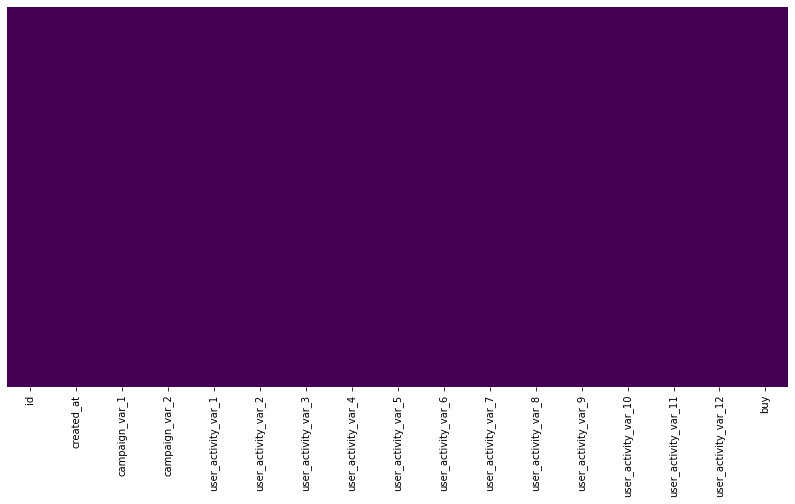

In [345]:
# Remove columns products_purchased and signup_date
df = df.drop(columns="products_purchased")
df = df.drop(columns="signup_date")
plt.figure(figsize=(14, 7))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap="viridis")

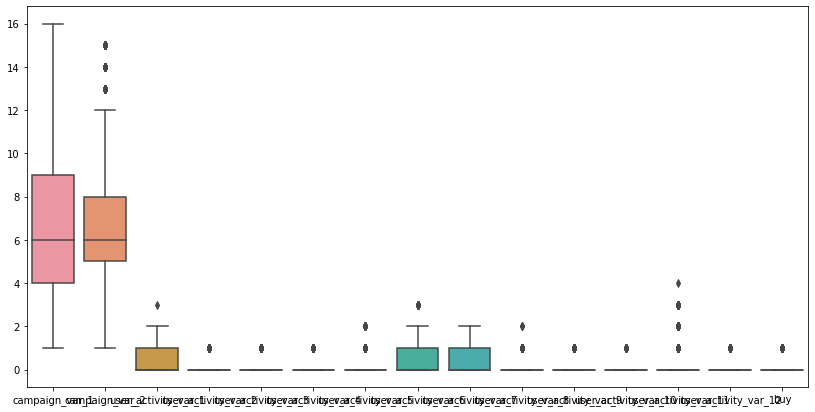

In [346]:
plt.figure(figsize=(14, 7))
sns.boxplot(data=df[['created_at', 'campaign_var_1', 'campaign_var_2',
        'user_activity_var_1',
       'user_activity_var_2', 'user_activity_var_3', 'user_activity_var_4',
       'user_activity_var_5', 'user_activity_var_6', 'user_activity_var_7',
       'user_activity_var_8', 'user_activity_var_9', 'user_activity_var_10',
       'user_activity_var_11', 'user_activity_var_12', 'buy']])
plt.show()

In [347]:
df.nunique()

id                      39161
created_at                365
campaign_var_1             16
campaign_var_2             15
user_activity_var_1         4
user_activity_var_2         2
user_activity_var_3         2
user_activity_var_4         2
user_activity_var_5         3
user_activity_var_6         4
user_activity_var_7         3
user_activity_var_8         3
user_activity_var_9         2
user_activity_var_10        2
user_activity_var_11        5
user_activity_var_12        2
buy                         2
dtype: int64

In [348]:
df['created_at']=pd.to_datetime(df['created_at'])

In [349]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39161 entries, 0 to 39160
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    39161 non-null  int64         
 1   created_at            39161 non-null  datetime64[ns]
 2   campaign_var_1        39161 non-null  int64         
 3   campaign_var_2        39161 non-null  int64         
 4   user_activity_var_1   39161 non-null  int64         
 5   user_activity_var_2   39161 non-null  int64         
 6   user_activity_var_3   39161 non-null  int64         
 7   user_activity_var_4   39161 non-null  int64         
 8   user_activity_var_5   39161 non-null  int64         
 9   user_activity_var_6   39161 non-null  int64         
 10  user_activity_var_7   39161 non-null  int64         
 11  user_activity_var_8   39161 non-null  int64         
 12  user_activity_var_9   39161 non-null  int64         
 13  user_activity_va

In [350]:
df['created_at_year'] = df['created_at'].dt.year
df.head()

,id,created_at,campaign_var_1,campaign_var_2,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy,created_at_year
0,1,2021-01-01,1,2,0,0,0,0,0,0,1,1,0,0,0,0,0,2021
1,2,2021-01-01,2,1,1,0,1,0,0,0,1,0,0,0,0,0,0,2021
2,3,2021-01-01,9,3,1,0,0,0,0,0,0,0,0,0,0,0,0,2021
3,4,2021-01-01,6,7,0,0,0,0,0,0,0,0,0,0,0,0,0,2021
4,5,2021-01-01,4,6,0,0,0,0,0,0,1,0,0,0,1,0,0,2021


In [351]:
df['created_at_month'] = df['created_at'].dt.month
df['created_at_day'] = df['created_at'].dt.day

In [352]:
df = df.drop(columns="created_at")
df.head()

,id,campaign_var_1,campaign_var_2,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy,created_at_year,created_at_month,created_at_day
0,1,1,2,0,0,0,0,0,0,1,1,0,0,0,0,0,2021,1,1
1,2,2,1,1,0,1,0,0,0,1,0,0,0,0,0,0,2021,1,1
2,3,9,3,1,0,0,0,0,0,0,0,0,0,0,0,0,2021,1,1
3,4,6,7,0,0,0,0,0,0,0,0,0,0,0,0,0,2021,1,1
4,5,4,6,0,0,0,0,0,0,1,0,0,0,1,0,0,2021,1,1


In [353]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39161 entries, 0 to 39160
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   id                    39161 non-null  int64
 1   campaign_var_1        39161 non-null  int64
 2   campaign_var_2        39161 non-null  int64
 3   user_activity_var_1   39161 non-null  int64
 4   user_activity_var_2   39161 non-null  int64
 5   user_activity_var_3   39161 non-null  int64
 6   user_activity_var_4   39161 non-null  int64
 7   user_activity_var_5   39161 non-null  int64
 8   user_activity_var_6   39161 non-null  int64
 9   user_activity_var_7   39161 non-null  int64
 10  user_activity_var_8   39161 non-null  int64
 11  user_activity_var_9   39161 non-null  int64
 12  user_activity_var_10  39161 non-null  int64
 13  user_activity_var_11  39161 non-null  int64
 14  user_activity_var_12  39161 non-null  int64
 15  buy                   39161 non-null  int64
 16  crea

# Feature Importance

In [354]:
X=df.drop(columns=['buy'])
Y=df['buy']
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3)

In [355]:
rf=RandomForestClassifier()
 
rf.fit(x_train,y_train)
rf.feature_importances_

array([0.1518654 , 0.06136683, 0.0549452 , 0.01835464, 0.09490648,
       0.00828737, 0.11610492, 0.02095301, 0.0208426 , 0.01032757,
       0.00671352, 0.17720751, 0.00481142, 0.10824485, 0.00292422,
       0.        , 0.04735601, 0.09478844])

Text(0.5, 0, 'Random Forest Feature Importance')

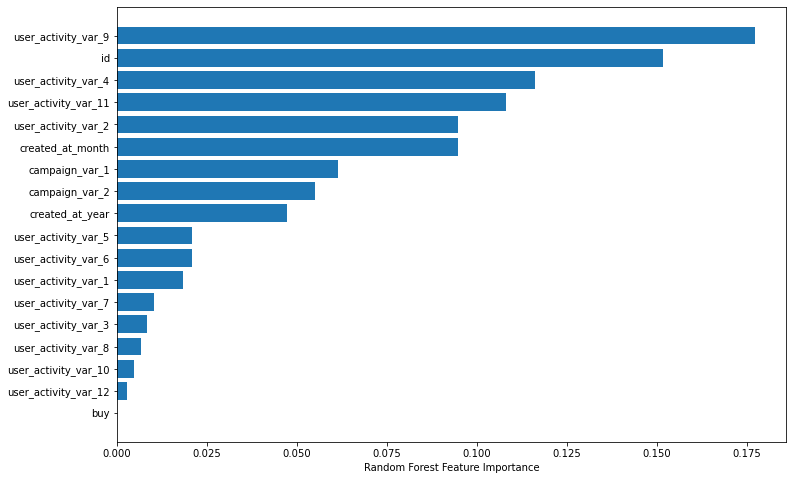

In [356]:
plt.figure(figsize=(12, 8))
sorted_idx = rf.feature_importances_.argsort()
plt.barh(df.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

# Train Test Split

In [357]:
x_train.columns

Index(['id', 'campaign_var_1', 'campaign_var_2', 'user_activity_var_1',
       'user_activity_var_2', 'user_activity_var_3', 'user_activity_var_4',
       'user_activity_var_5', 'user_activity_var_6', 'user_activity_var_7',
       'user_activity_var_8', 'user_activity_var_9', 'user_activity_var_10',
       'user_activity_var_11', 'user_activity_var_12', 'created_at_year',
       'created_at_month', 'created_at_day'],
      dtype='object')

In [358]:
x_train.columns

Index(['id', 'campaign_var_1', 'campaign_var_2', 'user_activity_var_1',
       'user_activity_var_2', 'user_activity_var_3', 'user_activity_var_4',
       'user_activity_var_5', 'user_activity_var_6', 'user_activity_var_7',
       'user_activity_var_8', 'user_activity_var_9', 'user_activity_var_10',
       'user_activity_var_11', 'user_activity_var_12', 'created_at_year',
       'created_at_month', 'created_at_day'],
      dtype='object')

# Standarization

In [359]:
# Check for data standard
x_train.std()

id                      1.130872e+04
campaign_var_1          3.477507e+00
campaign_var_2          2.613543e+00
user_activity_var_1     5.082254e-01
user_activity_var_2     8.187531e-02
user_activity_var_3     3.051313e-01
user_activity_var_4     1.060789e-01
user_activity_var_5     3.600726e-01
user_activity_var_6     5.575485e-01
user_activity_var_7     4.568280e-01
user_activity_var_8     3.788476e-01
user_activity_var_9     1.069157e-01
user_activity_var_10    1.909670e-02
user_activity_var_11    4.296006e-01
user_activity_var_12    2.561717e-02
created_at_year         2.273778e-13
created_at_month        3.141650e+00
created_at_day          8.797547e+00
dtype: float64

In [360]:
#Applying StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train_std = scaler.transform(x_train)
print(x_train_std.std())

0.97182531580755


In [361]:
x_train=x_train_std

In [362]:
# Check for data standard
x_test.std()

id                      11296.510355
campaign_var_1              3.462336
campaign_var_2              2.615762
user_activity_var_1         0.511396
user_activity_var_2         0.081212
user_activity_var_3         0.300478
user_activity_var_4         0.107357
user_activity_var_5         0.358779
user_activity_var_6         0.559623
user_activity_var_7         0.453318
user_activity_var_8         0.381650
user_activity_var_9         0.105007
user_activity_var_10        0.020626
user_activity_var_11        0.436058
user_activity_var_12        0.018449
created_at_year             0.000000
created_at_month            3.134069
created_at_day              8.758831
dtype: float64

In [363]:
#scaler = StandardScaler()
scaler.fit(x_test)
x_test_std = scaler.transform(x_test)
print(x_test_std.std())

0.9718253158075499


In [365]:
x_test=x_test_std

<AxesSubplot:>

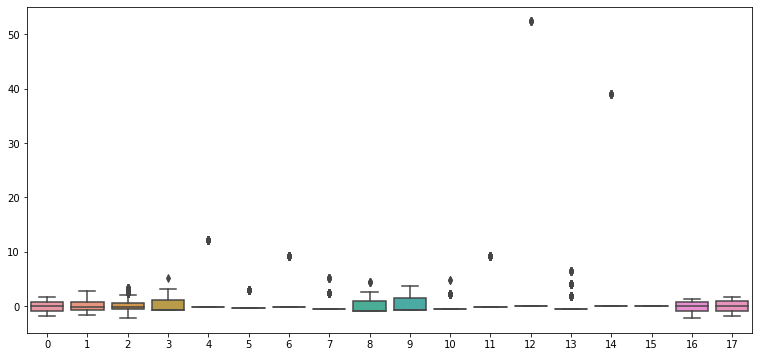

In [366]:
plt.figure(figsize=(13, 6))
sns.boxplot(data=x_train) 

# ANN Model

In [323]:
from keras import Sequential
from keras.layers import Dense

In [387]:
model = Sequential()

model.add(Dense(20, input_dim=18, activation='relu'))
model.add(Dense(22, activation='relu'))
#model.add(Dense(20, activation='relu'))
model.add(Dense(24, activation='relu'))
model.add(Dense(22, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(18, activation='relu'))
model.add(Dense(15, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(3, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
epoch = 100

In [388]:
# fit the keras model on the dataset
history = model.fit(x_train, y_train, validation_split=0.02,  epochs=epoch, batch_size=32)

Epoch 1/100
840/840 [==============================] - 1s 1ms/step - loss: 0.1500 - accuracy: 0.9580 - val_loss: 0.0875 - val_accuracy: 0.9800
Epoch 2/100
840/840 [==============================] - 1s 1ms/step - loss: 0.1007 - accuracy: 0.9741 - val_loss: 0.1028 - val_accuracy: 0.9672
Epoch 3/100
840/840 [==============================] - 1s 985us/step - loss: 0.0980 - accuracy: 0.9741 - val_loss: 0.0826 - val_accuracy: 0.9781
Epoch 4/100
840/840 [==============================] - 1s 981us/step - loss: 0.0961 - accuracy: 0.9743 - val_loss: 0.0819 - val_accuracy: 0.9818
Epoch 5/100
840/840 [==============================] - 1s 1ms/step - loss: 0.0939 - accuracy: 0.9751 - val_loss: 0.0823 - val_accuracy: 0.9800
Epoch 6/100
840/840 [==============================] - 1s 1ms/step - loss: 0.0933 - accuracy: 0.9751 - val_loss: 0.0824 - val_accuracy: 0.9781
Epoch 7/100
840/840 [==============================] - 1s 1ms/step - loss: 0.0926 - accuracy: 0.9747 - val_loss: 0.0812 - val_accuracy: 0.

Epoch 58/100
840/840 [==============================] - 1s 990us/step - loss: 0.0775 - accuracy: 0.9768 - val_loss: 0.0776 - val_accuracy: 0.9800
Epoch 59/100
840/840 [==============================] - 1s 1ms/step - loss: 0.0774 - accuracy: 0.9770 - val_loss: 0.0910 - val_accuracy: 0.9800
Epoch 60/100
840/840 [==============================] - 1s 973us/step - loss: 0.0770 - accuracy: 0.9768 - val_loss: 0.0797 - val_accuracy: 0.9800
Epoch 61/100
840/840 [==============================] - 1s 992us/step - loss: 0.0767 - accuracy: 0.9771 - val_loss: 0.0825 - val_accuracy: 0.9818
Epoch 62/100
840/840 [==============================] - 1s 992us/step - loss: 0.0769 - accuracy: 0.9768 - val_loss: 0.0855 - val_accuracy: 0.9800
Epoch 63/100
840/840 [==============================] - 1s 992us/step - loss: 0.0761 - accuracy: 0.9773 - val_loss: 0.0872 - val_accuracy: 0.9818
Epoch 64/100
840/840 [==============================] - 1s 992us/step - loss: 0.0757 - accuracy: 0.9768 - val_loss: 0.0801 - v

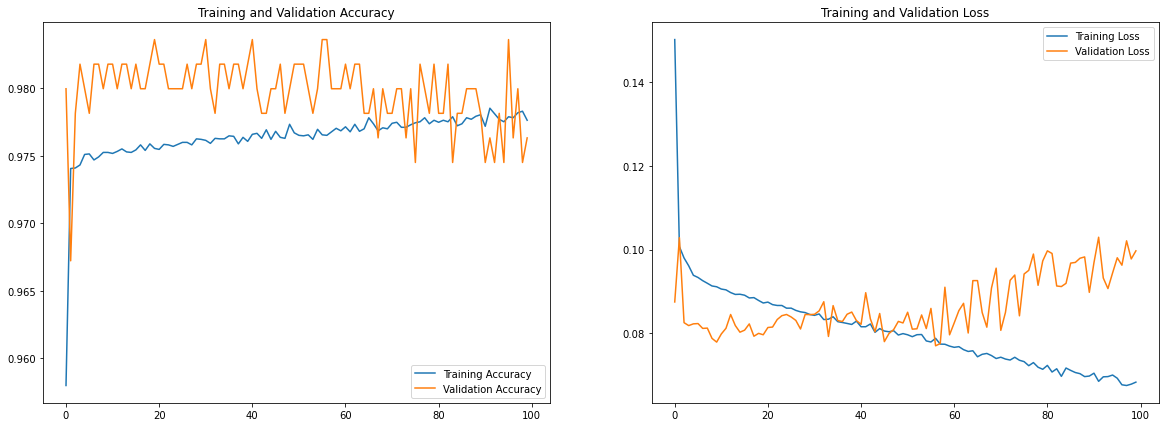

In [389]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epoch)

plt.figure(figsize=(20, 7))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()
#plt.savefig("Accuracy.png")